### `LSTM Model (Long Short Term Memory)`

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import matplotlib.pyplot as plt
#import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
pd.set_option('max_colwidth',150)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 - <h3> Importer les données labelisées 

In [3]:
df = pd.read_pickle('df_Abstract_supervised.pkl')
df.head(2)

Titre  \
0                       The basics of intravascular optical coherence tomography   
1  An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   

                                                                                                                                                  Resume  \
0  Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1  This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   

                                                     URL  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                              #item_204   

                   Auteur                     Class  \
0          Roleder Tomasz           Active catheter   
1  Madgwick Sebastian O H  Multi Sensor Data Fusion   

                   ParentClass  \
0  Radiologie interventionelle   
1                           RI   

                                                                                                                                              BagOfWords  
0  basics coherence tomography coherence tomography oct horizons imaging provide microscopic pathology arteries coherence tomography composition plaq...  
1  orientation ﬁlter sensor arrays report presents orientation imus gyroscopes accelerometers sensor arrays magnetometers implementation incorporates...

In [4]:
len(df.ParentClass.unique())

11

- <h3> Encoder la target

In [5]:
from sklearn.preprocessing import LabelEncoder
df['Target'] = LabelEncoder().fit_transform(df['ParentClass'])
df.head(2)

Titre  \
0                       The basics of intravascular optical coherence tomography   
1  An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   

                                                                                                                                                  Resume  \
0  Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1  This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   

                                                     URL  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                              #item_204   

                   Auteur                     Class  \
0          Roleder Tomasz           Active catheter   
1  Madgwick Sebastian O H  Multi Sensor Data Fusion   

                   ParentClass  \
0  Radiologie interventionelle   
1                           RI   

                                                                                                                                              BagOfWords  \
0  basics coherence tomography coherence tomography oct horizons imaging provide microscopic pathology arteries coherence tomography composition plaq...   
1  orientation ﬁlter sensor arrays report presents orientation imus gyroscopes accelerometers sensor arrays magnetometers implementation incorporates...   

   Target  
0      10  
1       9

In [6]:
# Rechercher le nombre d'occurence des classes
a = df.Target.value_counts()
# a

- <h3> Récuperer les mots du BOW

In [7]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 3000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['BagOfWords'].values)
word_index_train = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_train))
    

Found 3246 unique tokens.


In [8]:
tokenizer.fit_on_texts(df['BagOfWords'].values)
word_index_test = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_test))

Found 3246 unique tokens.


In [9]:
#word_index_train

In [10]:
X = tokenizer.texts_to_sequences(df['BagOfWords'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (391, 50)


In [11]:
X

array([[1794, 1049,  875, ..., 1808, 1809,   79],
       [1818, 1057,  878, ...,   50, 1321,  371],
       [1822,   12, 1823, ...,  130,  162, 1324],
       ...,
       [   0,    0,   20, ...,  308,  552,  831],
       [ 874,  110,  874, ...,   24,    4,  201],
       [1787,   18, 1046, ..., 1046, 1047,  739]])

- <h3> faire les dummies sur la target

In [12]:
def dummies_target(df):
    Y = pd.get_dummies(df['ParentClass'],prefix='')
    print('Shape of label tensor:', Y.shape)
    return Y

In [13]:
y = dummies_target(df)
y


Shape of label tensor: (391, 11)


_AAP Covid19 armées  _ARES medica R&D intégrée  _Biblio KPI EV  \
0                      0                          0               0   
1                      0                          0               0   
2                      0                          0               0   
3                      0                          0               0   
4                      0                          0               0   
..                   ...                        ...             ...   
221                    0                          0               0   
222                    0                          0               0   
223                    0                          0               0   
224                    0                          0               0   
225                    0                          0               1   

     _G3P-Gravityless3Printing  _IA pour régulation d'impression 3D  \
0                            0                                    0   
1                            0                                    0   
2                            0                                    0   
3                            0                                    0   
4                            0                                    0   
..                         ...                                  ...   
221                          0                                    0   
222                          0                                    0   
223                          0                                    0   
224                          0                                    0   
225                          0                                    0   

     _Navigation hybride  _Par Problème  _Par Technologie  _R&D_intégrée  _RI  \
0                      0              0                 0              0    0   
1                      0              0                 0              0    1   
2                      0              0                 0              0    0   
3                      0              0                 0              0    0   
4                      0              0                 0              0    0   
..                   ...            ...               ...            ...  ...   
221                    0              0                 0              1    0   
222                    0              0                 0              1    0   
223                    0              0                 0              1    0   
224                    0              0                 0              1    0   
225                    0              0                 0              0    0   

     _Radiologie interventionelle  
0                               1  
1                               0  
2                               1  
3                               1  
4                               1  
..                            ...  
221                             0  
222                             0  
223                             0  
224                             0  
225                             0  

[391 rows x 11 columns]

- <h3> Train, test sets

In [14]:
x_train,x_test,y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)
print(x_train.shape,'\n')
print(x_test.shape,'\n')
print(y_train.shape,'\n')
print(y_test.shape,'\n')

(293, 50) 

(98, 50) 

(293, 11) 

(98, 11) 



In [15]:
y_test

_AAP Covid19 armées  _ARES medica R&D intégrée  _Biblio KPI EV  \
9                      0                          0               0   
14                     0                          0               0   
5                      0                          0               0   
147                    0                          0               0   
205                    0                          0               0   
..                   ...                        ...             ...   
47                     0                          0               0   
73                     0                          0               0   
76                     0                          0               0   
16                     0                          0               0   
38                     0                          0               0   

     _G3P-Gravityless3Printing  _IA pour régulation d'impression 3D  \
9                            0                                    0   
14                           1                                    0   
5                            1                                    0   
147                          0                                    0   
205                          0                                    0   
..                         ...                                  ...   
47                           1                                    0   
73                           0                                    0   
76                           0                                    1   
16                           0                                    0   
38                           1                                    0   

     _Navigation hybride  _Par Problème  _Par Technologie  _R&D_intégrée  _RI  \
9                      0              0                 0              0    1   
14                     0              0                 0              0    0   
5                      0              0                 0              0    0   
147                    0              0                 0              1    0   
205                    0              0                 0              1    0   
..                   ...            ...               ...            ...  ...   
47                     0              0                 0              0    0   
73                     0              0                 1              0    0   
76                     0              0                 0              0    0   
16                     0              0                 0              0    1   
38                     0              0                 0              0    0   

     _Radiologie interventionelle  
9                               0  
14                              0  
5                               0  
147                             0  
205                             0  
..                            ...  
47                              0  
73                              0  
76                              0  
16                              0  
38                              0  

[98 rows x 11 columns]

- <h3> Création du modèle

In [17]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x_train.shape[1]+x_test.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          300000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 11)                1111      
Total params: 381,511
Trainable params: 381,511
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
def model_lstm(epochs,batch_size):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test,y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    return history


In [24]:
history = model_lstm(16,73)
history

Epoch 1/16
5/5 [==============================] - 0s 66ms/step - loss: 0.7588 - accuracy: 0.7816 - val_loss: 1.1727 - val_accuracy: 0.6429
Epoch 2/16
5/5 [==============================] - 0s 64ms/step - loss: 0.7234 - accuracy: 0.7747 - val_loss: 1.1759 - val_accuracy: 0.5918
Epoch 3/16
5/5 [==============================] - 0s 79ms/step - loss: 0.6787 - accuracy: 0.7338 - val_loss: 1.1591 - val_accuracy: 0.6224
Epoch 4/16
5/5 [==============================] - 0s 74ms/step - loss: 0.6436 - accuracy: 0.7577 - val_loss: 1.2429 - val_accuracy: 0.6531
Epoch 5/16
5/5 [==============================] - 0s 88ms/step - loss: 0.7360 - accuracy: 0.7509 - val_loss: 1.3321 - val_accuracy: 0.6122
Epoch 6/16
5/5 [==============================] - 0s 63ms/step - loss: 0.7557 - accuracy: 0.7543 - val_loss: 1.2580 - val_accuracy: 0.6020


- <h3> Evaluer le modèle

In [31]:
accr = model.evaluate(x_train,y_train)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10/10 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.7611
Test set
  Loss: 0.693
  Accuracy: 0.761


In [26]:
accr = model.evaluate(x_test,y_test)
print(' Accuracy: {:0.3f}'.format(accr[1]*100))

4/4 [==============================] - 0s 6ms/step - loss: 1.2580 - accuracy: 0.6020
 Accuracy: 60.204


- <h3> Plot loss de train et test

Text(0.5, 1.0, 'Loss')

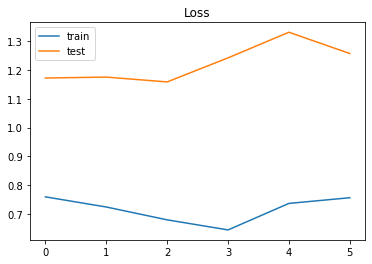

In [27]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

- <h3> Plot l'accuracy de train et test

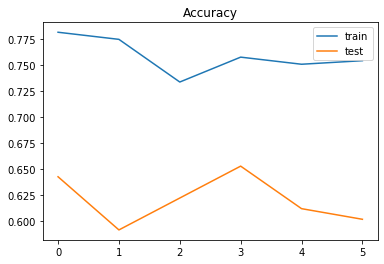

In [28]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

- <h3> Prédiction

In [55]:
pred = model.predict(x_test)
#print(pred[1])
pd.DataFrame(pred)

[0.00292254 0.00299024 0.00551402 0.16475481 0.7502263  0.0014061
 0.00485782 0.01888344 0.04084495 0.00328902 0.00431088]


0         1         2         3         4         5         6  \
0   0.004956  0.005690  0.017845  0.147803  0.548127  0.001963  0.007696   
1   0.002923  0.002990  0.005514  0.164755  0.750226  0.001406  0.004858   
2   0.002656  0.002781  0.004749  0.144909  0.774503  0.001249  0.004572   
3   0.000559  0.001148  0.009356  0.003235  0.007213  0.000223  0.000670   
4   0.000389  0.000854  0.006725  0.002938  0.006608  0.000141  0.000501   
..       ...       ...       ...       ...       ...       ...       ...   
93  0.002908  0.003340  0.006129  0.160052  0.727521  0.001362  0.005062   
94  0.113150  0.085139  0.082498  0.055462  0.045738  0.133269  0.118293   
95  0.003002  0.003139  0.005920  0.166686  0.738012  0.001365  0.005079   
96  0.116225  0.093564  0.085645  0.054913  0.042265  0.139883  0.103815   
97  0.003127  0.003558  0.007432  0.160587  0.710649  0.001436  0.005339   

           7         8         9        10  
0   0.017928  0.237475  0.005653  0.004862  
1   0.018883  0.040845  0.003289  0.004311  
2   0.017729  0.039850  0.003024  0.003977  
3   0.000491  0.975911  0.000941  0.000252  
4   0.000362  0.980622  0.000676  0.000185  
..       ...       ...       ...       ...  
93  0.018547  0.067586  0.003413  0.004079  
94  0.092676  0.034814  0.097663  0.141298  
95  0.018573  0.050529  0.003331  0.004365  
96  0.086852  0.045567  0.101057  0.130214  
97  0.018717  0.081482  0.003604  0.004069  

[98 rows x 11 columns]

In [35]:
acc = model.evaluate(pred, y_test)
acc

4/4 [==============================] - 0s 2ms/step - loss: 2.5104 - accuracy: 0.0000e+00


[2.5104310512542725, 0.0]

In [57]:
y_test

_AAP Covid19 armées  _ARES medica R&D intégrée  _Biblio KPI EV  \
9                      0                          0               0   
14                     0                          0               0   
5                      0                          0               0   
147                    0                          0               0   
205                    0                          0               0   
..                   ...                        ...             ...   
47                     0                          0               0   
73                     0                          0               0   
76                     0                          0               0   
16                     0                          0               0   
38                     0                          0               0   

     _G3P-Gravityless3Printing  _IA pour régulation d'impression 3D  \
9                            0                                    0   
14                           1                                    0   
5                            1                                    0   
147                          0                                    0   
205                          0                                    0   
..                         ...                                  ...   
47                           1                                    0   
73                           0                                    0   
76                           0                                    1   
16                           0                                    0   
38                           1                                    0   

     _Navigation hybride  _Par Problème  _Par Technologie  _R&D_intégrée  _RI  \
9                      0              0                 0              0    1   
14                     0              0                 0              0    0   
5                      0              0                 0              0    0   
147                    0              0                 0              1    0   
205                    0              0                 0              1    0   
..                   ...            ...               ...            ...  ...   
47                     0              0                 0              0    0   
73                     0              0                 1              0    0   
76                     0              0                 0              0    0   
16                     0              0                 0              0    1   
38                     0              0                 0              0    0   

     _Radiologie interventionelle  
9                               0  
14                              0  
5                               0  
147                             0  
205                             0  
..                            ...  
47                              0  
73                              0  
76                              0  
16                              0  
38                              0  

[98 rows x 11 columns]

On remarque que l'accuracy du test et train ont un écart significatif celà peut se justifier par le nombre de données insuffisant. 
Comme conclusion, ce modèle ne marche pas bien sur nos données car elle ne sont pas volumineuses.